In [1]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(42)

In [2]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
x

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [3]:
y = np.array([[1], [0], [0], [1]])
y

array([[1],
       [0],
       [0],
       [1]])

In [4]:
x = tf.convert_to_tensor(x, dtype = tf.float32, name = 'X')
y = tf.convert_to_tensor(y, dtype = tf.float32, name = 'y')

In [5]:
input_neurons = 2
hidden_neurons = 3
output_neurons = 1

In [6]:
weights = {
  'hidden': tf.Variable(tf.random.normal([input_neurons, hidden_neurons]), name = 'hidden_weights'),
  'output': tf.Variable(tf.random.normal([hidden_neurons, output_neurons]), name = 'output_weights')
}

In [7]:
print(type(weights))
print(type(weights['hidden']))
print(weights['hidden'])
print(weights['output'])

<class 'dict'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<tf.Variable 'hidden_weights:0' shape=(2, 3) dtype=float32, numpy=
array([[ 0.3274685, -0.8426258,  0.3194337],
       [-1.4075519, -2.3880599, -1.0392479]], dtype=float32)>
<tf.Variable 'output_weights:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.08422458],
       [-0.86090374],
       [ 0.37812304]], dtype=float32)>


In [8]:
distribution = np.random.normal(size = 500)
distribution

array([ 1.43578906e+00,  6.01192001e-01, -1.14127484e+00,  9.59338452e-01,
        1.89608878e+00, -3.31850256e-01, -1.26645053e+00,  3.83216478e-01,
        9.12552590e-01,  9.92802306e-01,  1.07399272e-02,  5.70916874e-01,
       -2.87020275e-01,  1.43760159e+00,  1.14406418e+00,  3.22073394e-01,
       -1.03244892e+00, -2.41206075e-01, -6.22692928e-01, -4.42907669e-01,
       -3.05285181e-01, -1.92224383e-01, -1.86496190e+00, -9.82191644e-01,
       -1.38132743e+00,  8.28304605e-01,  1.22066491e+00, -2.12124119e+00,
       -5.36455603e-01, -4.91448840e-01,  2.28560626e-01, -2.39896696e-02,
        4.00983200e-01, -4.85804290e-01,  2.46859471e-01, -1.28293208e+00,
       -4.41507687e-01, -1.33966857e+00, -1.63653589e+00,  6.27293713e-01,
       -1.11236546e-01,  1.20298403e+00, -8.15225559e-01,  1.20980496e+00,
       -1.20453765e+00,  6.15994161e-01,  7.85503131e-01, -1.17506387e+00,
        1.06385956e+00, -4.30451570e-01, -7.94676753e-01, -2.91601636e-01,
       -5.53239967e-01,  

c:\Users\Matheus\.conda\envs\machine_learning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

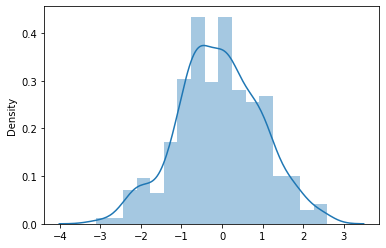

In [9]:
import seaborn as sns
sns.distplot(distribution)

In [10]:
hidden_bias = {
  'hidden': tf.Variable(tf.random.normal([hidden_neurons]), name = 'hidden_bias'),
  'output': tf.Variable(tf.random.normal([output_neurons]), name = 'output_bias')
}

In [11]:
print(hidden_bias['hidden'])
print(hidden_bias['output'])

<tf.Variable 'hidden_bias:0' shape=(3,) dtype=float32, numpy=array([-0.55909735, -0.5347214 ,  2.3730333 ], dtype=float32)>
<tf.Variable 'output_bias:0' shape=(1,) dtype=float32, numpy=array([0.65648675], dtype=float32)>


In [14]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.5)

for epoch in range(100000):
  with tf.GradientTape() as tape:
    hidden_layer = tf.add(tf.matmul(x, weights['hidden']), hidden_bias['hidden'])
    hidden_activation_layer = tf.sigmoid(hidden_layer)

    output_layer = tf.add(tf.matmul(hidden_activation_layer, weights['output']), 
    hidden_bias['output'])
    output_activation_layer = tf.sigmoid(output_layer)

    loss = tf.keras.losses.MSE(y, output_activation_layer)

  weights_values = [weights['hidden'], weights['output'], hidden_bias['hidden'], 
  hidden_bias['output']]

  gradients = tape.gradient(loss, weights_values)

  

  optimizer.apply_gradients(zip(gradients, weights_values))

  if epoch % 200 == 0:
    average_loss = tf.reduce_mean(loss).numpy()
    print(average_loss)

0.0001295631
0.00012682952
0.00012420656
0.0001216894
0.000119270524
0.00011694508
0.00011470816
0.00011255333
0.000110477115
0.00010847639
0.00010654396
0.000104680716
0.000102878876
0.00010113894
9.945566e-05
9.7826225e-05
9.6248885e-05
9.472115e-05
9.324156e-05
9.180621e-05
9.0412614e-05
8.906156e-05
8.7750006e-05
8.647604e-05
8.523813e-05
8.403482e-05
8.286401e-05
8.172653e-05
8.0619015e-05
7.9541314e-05
7.849094e-05
7.746795e-05
7.646918e-05
7.5497876e-05
7.4551004e-05
7.362587e-05
7.272232e-05
7.18426e-05
7.098408e-05
7.014304e-05
6.932267e-05
6.8523295e-05
6.773913e-05
6.6973684e-05
6.622521e-05
6.5492466e-05
6.4776395e-05
6.407424e-05
6.339012e-05
6.2716135e-05
6.205956e-05
6.1415354e-05
6.0783754e-05
6.016565e-05
5.95599e-05
5.8964928e-05
5.8383637e-05
5.7811747e-05
5.7251542e-05
5.6701585e-05
5.6163386e-05
5.5633405e-05
5.511479e-05
5.4604712e-05
5.4103893e-05
5.361323e-05
5.3130272e-05
5.2655214e-05
5.2189345e-05
5.1731484e-05
5.1283067e-05
5.0839935e-05
5.0405346e-05
4.9978

In [13]:
# test
hidden_test_layer = tf.add(tf.matmul(x, weights['hidden']), hidden_bias['hidden'])
hidden_test_activation_layer = tf.sigmoid(hidden_test_layer)

output_hidden_test_layer = tf.add(tf.matmul(hidden_test_activation_layer, weights['output']),
 hidden_bias['output'])
output_hidden_test_activation_layer = tf.sigmoid(output_hidden_test_layer)

print(output_hidden_test_activation_layer)

tf.Tensor(
[[0.9934284 ]
 [0.01304954]
 [0.01070115]
 [0.9862065 ]], shape=(4, 1), dtype=float32)
